# TITANIC SURVIVAL PREDICTION

RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship. The disaster drew public attention, spurred major changes in maritime safety regulations, and inspired many artistic works.

RMS Titanic was the largest ship afloat at the time she entered service and the second of three Olympic-class ocean liners built for the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, the chief naval architect of the shipyard, died in the disaster. Titanic was under the command of Captain Edward Smith, who went down with the ship. The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from the British Isles, Scandinavia, and elsewhere throughout Europe, who were seeking a new life in the United States and Canada.

The first-class accommodation was designed to be the pinnacle of comfort and luxury, with a gymnasium, swimming pool, smoking rooms, high-class restaurants and cafes, a Turkish bath, and hundreds of opulent cabins. A high-powered radiotelegraph transmitter was available for sending passenger "marconigrams" and for the ship's operational use. Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, contributing to its reputation as "unsinkable".

Titanic was equipped with 16 lifeboat davits, each capable of lowering three lifeboats, for a total of 48 boats. However, she actually carried only 20 lifeboats, four of which were collapsible and proved hard to launch while she was sinking (Collapsible A nearly swamped and was filled with a foot of water until rescue; Collapsible B completely overturned while launching). Together, the 20 lifeboats could hold 1,178 people—about half the number of passengers on board, and one-third of the number of passengers the ship could have carried at full capacity (a number consistent with the maritime safety regulations of the era). When the ship sank, the lifeboats that had been lowered were only filled up to an average of 60%.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg' width=700 height=700>

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Importing the dataset

In [2]:
df = pd.read_csv(r"C:\Users\aditya kumar\Downloads\tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Data Visualization

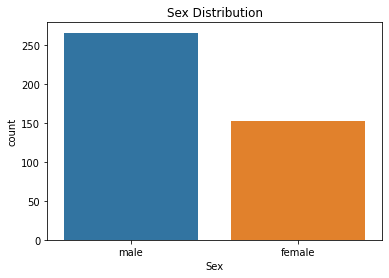

In [5]:
sns.countplot(x='Sex',data=df)
plt.title('Sex Distribution')
plt.show()

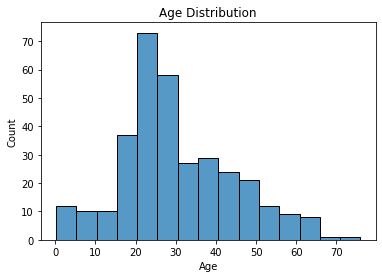

In [6]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

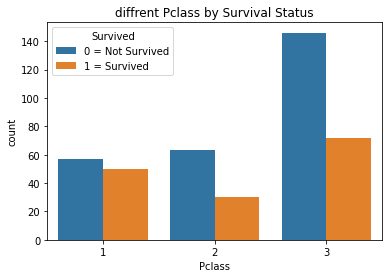

In [7]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

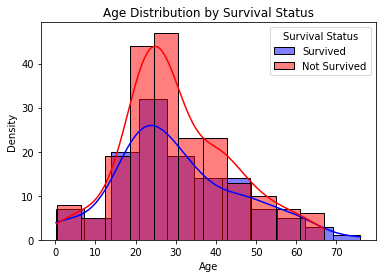

In [8]:
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')

sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')

plt.legend(title='Survival Status')

plt.show()

### Data Preprocessing

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [13]:
df['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [14]:
df['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32

In [15]:
df=df.iloc[:,[1,2,4,5,3,6,7,0]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Age       332 non-null    float64
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df.iloc[:,4:6]=imputer.fit_transform(df.iloc[:,4:6])
df

,Pclass,Sex,SibSp,Parch,Age,Fare,Embarked,Survived
0,3,1,0,0,34.50000,7.8292,1,0
1,3,0,1,0,47.00000,7.0000,2,1
2,2,1,0,0,62.00000,9.6875,1,0
3,3,1,0,0,27.00000,8.6625,2,0
4,3,0,1,1,22.00000,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,0,0,30.27259,8.0500,2,0
414,1,0,0,0,39.00000,108.9000,0,1
415,3,1,0,0,38.50000,7.2500,2,0
416,3,1,0,0,30.27259,8.0500,2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Age       418 non-null    float64
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
 7   Survived  418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


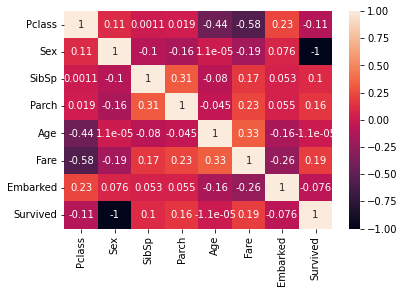

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)
plt.show()

In [19]:
X= df.iloc[:,0:7].values
y= df.iloc[:,7].values

In [20]:
X

array([[ 3.        ,  1.        ,  0.        , ..., 34.5       ,
         7.8292    ,  1.        ],
       [ 3.        ,  0.        ,  1.        , ..., 47.        ,
         7.        ,  2.        ],
       [ 2.        ,  1.        ,  0.        , ..., 62.        ,
         9.6875    ,  1.        ],
       ...,
       [ 3.        ,  1.        ,  0.        , ..., 38.5       ,
         7.25      ,  2.        ],
       [ 3.        ,  1.        ,  0.        , ..., 30.27259036,
         8.05      ,  2.        ],
       [ 3.        ,  1.        ,  1.        , ..., 30.27259036,
        22.3583    ,  0.        ]])

In [21]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### Data Spliting

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [24]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0]


In [25]:
import sklearn.metrics as metrics
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy 1.0
Precision: 1.0
Recall: 1.0


In [26]:
from sklearn.metrics import classification_report
print(print(classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

None


#### Predicting the Survived Using random value

In [27]:
xrandom = [[3,1,0,0,34.50000,7.8292,1]]

y_pred1 = classifier.predict(xrandom)

print(y_pred1)

[0]


### K Neighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k=1
KnnClassifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2).fit(x_train,y_train)
ypred=KnnClassifier.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test,ypred))

Accuracy : 0.6428571428571429


In [29]:
print(print(classification_report(y_test,ypred)))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71        71
           1       0.62      0.47      0.54        55

    accuracy                           0.64       126
   macro avg       0.64      0.62      0.62       126
weighted avg       0.64      0.64      0.63       126

None


#### Predicting the Survived Using random value

In [30]:
xrandom = [[3,1,0,0,34.50000,7.8292,1]]

y_pred2 = KnnClassifier.predict(xrandom)

print(y_pred1)

[0]
